In [2]:
import torch

def return_first_pos_eigenvalue(a):
    """
    Returns the first positive eigenvalue of the laplacian of a graph
    :param a:
    :return:
    """
    degrees = torch.sum(a, dim=1).unsqueeze(-1)
    I = torch.eye(a.size()[0])
    D = torch.pow(degrees, -0.5).squeeze()
    D = torch.diag(D)
    lap_sym = I - torch.mm(torch.mm(D, a), D)

    eigenvalues = torch.sort(torch.real(torch.linalg.eigvals(lap_sym)))
    first_pos_eigenvalue = eigenvalues[0][1]

    return first_pos_eigenvalue, eigenvalues

In [ ]:
from scipy.sparse.linalg import eigs, eigsh
import scipy

def return_first_positive_eig_smarter(a):
    degrees = torch.sum(a, dim=1).unsqueeze(-1)
    I = torch.eye(a.size()[0])
    D = torch.pow(degrees, -0.5).squeeze()
    D = torch.diag(D)
    lap_sym = 2 * I - torch.mm(torch.mm(D, a), D)

    reversed_lap_sym = scipy.sparse.csr_matrix(lap_sym)

    lambda_max = eigs(reversed_lap_sym, k=1, which='LM', return_eigenvectors=False)

    return lambda_max

In [3]:
# make a 8 by 8 matrix
a = torch.tensor([[0, 1, 1, 0, 0, 0, 0, 0],
                  [1, 0, 1, 0, 0, 0, 0, 0],
                  [1, 1, 0, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0.5, 0, 0, 0],
                  [0, 0, 0, 0.5, 0, 1, 0, 0],
                  [0, 0, 0, 0, 1, 0, 1, 1],
                  [0, 0, 0, 0, 0, 1, 0, 1],
                  [0, 0, 0, 0, 0, 1, 1, 0]], dtype=torch.float32)

print(return_first_pos_eigenvalue(a))
#print(return_first_positive_eig_smarter(a))

(tensor(0.0628), torch.return_types.sort(
values=tensor([5.5879e-08, 6.2754e-02, 6.0462e-01, 1.0000e+00, 1.5000e+00, 1.5000e+00,
        1.5620e+00, 1.7706e+00]),
indices=tensor([0, 1, 2, 3, 7, 5, 6, 4])))


In [6]:
a= torch.tensor([[0, 1, 0, 0]
                ,[1, 0, 0.5, 0],
                 [0, 0.5, 0, 1],
                 [0, 0, 1, 0]]).float()
print(return_first_pos_eigenvalue(a))

(tensor(0.3333), torch.return_types.sort(
values=tensor([0.0000, 0.3333, 1.6667, 2.0000]),
indices=tensor([0, 1, 3, 2])))


In [45]:
# Test return_first_pos_eigenvalue function by giving it a weighted adjacency matrix
a= torch.tenosr([[1, 1, 0, 0],[1, 1, 1, 0],[0, 1, 1, 1],[0, 0, 1, 1]])
a = torch.tensor([[0, a, a, a, a, a, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, a, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=torch.float32)
return_first_pos_eigenvalue(a)

(tensor(0.6053),
 torch.return_types.sort(
 values=tensor([2.9487e-07, 6.0528e-01, 6.0528e-01, 7.3468e-01, 7.3468e-01, 1.3187e+00,
         1.3187e+00, 1.4597e+00, 1.4597e+00, 1.7633e+00]),
 indices=tensor([0, 9, 8, 2, 1, 4, 5, 7, 6, 3])))

In [36]:
from torch_geometric.utils import to_edge_index, dense_to_sparse, get_laplacian, to_dense_adj

edge_index, edge_weight = dense_to_sparse(a)

l_edge_index, l_edge_weight = get_laplacian(edge_index, edge_weight, "sym")

L = to_dense_adj(edge_index = l_edge_index, edge_attr = l_edge_weight, batch_size=1)


In [ ]:
def lamda_1_for_weighted_graphs(a):
    edge_index, edge_weight = dense_to_sparse(a)

    l_edge_index, l_edge_weight = get_laplacian(edge_index, edge_weight, "sym")

    L = to_dense_adj(edge_index = l_edge_index, edge_attr = l_edge_weight, batch_size=1)
    eigenvalues = torch.sort(torch.real(torch.linalg.eigvals(L.squeeze(0))))
    first_pos_eigenvalue = eigenvalues[0][1]

    return first_pos_eigenvalue


In [37]:
L

tensor([[[ 1.0000, -0.7071,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000, -0.7071],
         [-0.7071,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000, -1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -1.0000,  1.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000, -1.0000,  1.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000, -0.3162,  1.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -3.1623,  1.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000,
           1.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          -1.0000,  1.0000,  0.0000],
 

In [38]:
eigenvalues = torch.sort(torch.real(torch.linalg.eigvals(L.squeeze(0))))
first_pos_eigenvalue = eigenvalues[0][1]

In [39]:
first_pos_eigenvalue

tensor(0.2074)

In [40]:
eigenvalues

torch.return_types.sort(
values=tensor([-3.2140e-07,  2.0744e-01,  2.0744e-01,  7.0192e-01,  7.0192e-01,
         1.2981e+00,  1.2981e+00,  1.7926e+00,  1.7926e+00,  2.0000e+00]),
indices=tensor([0, 1, 2, 7, 6, 9, 8, 4, 5, 3]))

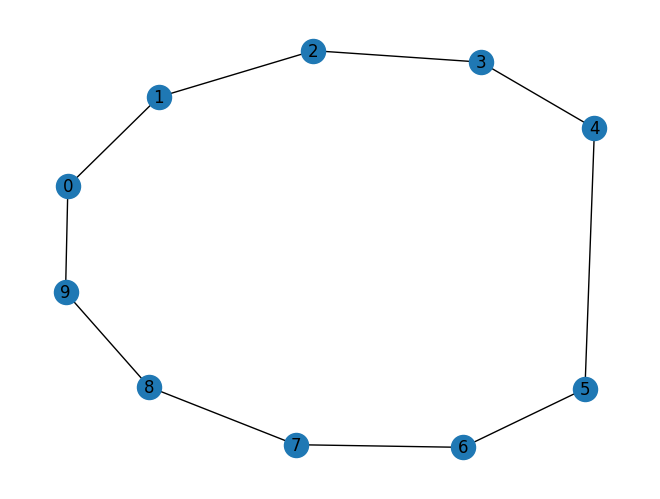

In [41]:
# print graph with networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_numpy_array(a.numpy())
nx.draw(G, with_labels=True)
plt.show()
